### Import Libraries

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#  Generate a DataFrame for Image Files and Their Labels

In [44]:
from pathlib import Path

#dataset_dir = Path("path/to/dataset")  # Replace with the path to your dataset
dataset_dir = Path("../Code/Rice_Image_Dataset")
classes = [d.name for d in dataset_dir.iterdir() if d.is_dir()]
#classes.remove('Rice_Citation_Request.txt')
num_classes = len(classes)

image_count = len(list(dataset_dir.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f"Number of classes: {num_classes}")
print("Classes:", classes)

Total images: 75000
Number of classes: 5
Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


#  Generate a DataFrame for Image Files and Their Labels

In [45]:
data = []

for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, img_file)
            data.append([file_path, class_name])

df = pd.DataFrame(data, columns=['Image', 'label'])

print(df.head())

                                               Image    label
0  D:/UofT Courses/Data Analysis Boot Camp/Projec...  Arborio
1  D:/UofT Courses/Data Analysis Boot Camp/Projec...  Arborio
2  D:/UofT Courses/Data Analysis Boot Camp/Projec...  Arborio
3  D:/UofT Courses/Data Analysis Boot Camp/Projec...  Arborio
4  D:/UofT Courses/Data Analysis Boot Camp/Projec...  Arborio


#   Exploring Dataset Distribution by Class

In [46]:
images_per_class = []
all_classes = []
for class_name in classes:
    total_images = len(os.listdir(os.path.join(dataset_dir, class_name)))
    images_per_class.append(total_images)
    all_classes.append(class_name)
    print(f'{class_name.capitalize()}: contains {total_images} images')

Arborio: contains 15000 images
Basmati: contains 15000 images
Ipsala: contains 15000 images
Jasmine: contains 15000 images
Karacadag: contains 15000 images


#   Distribution of Images in DataSet

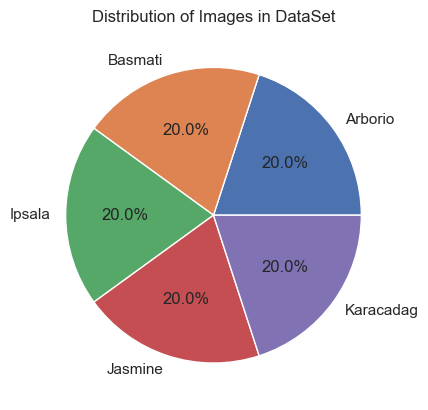

In [47]:
# Create pie chart
plt.pie(images_per_class, labels=all_classes, autopct='%1.1f%%')
plt.title('Distribution of Images in DataSet')
plt.show()

#  Distribution of Samples for Each Rice Class

C:\Users\Anwer.AAMD\AppData\Local\Temp\ipykernel_14804\3029864097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', palette=colors, data=df, edgecolor="black", linewidth=1.5)


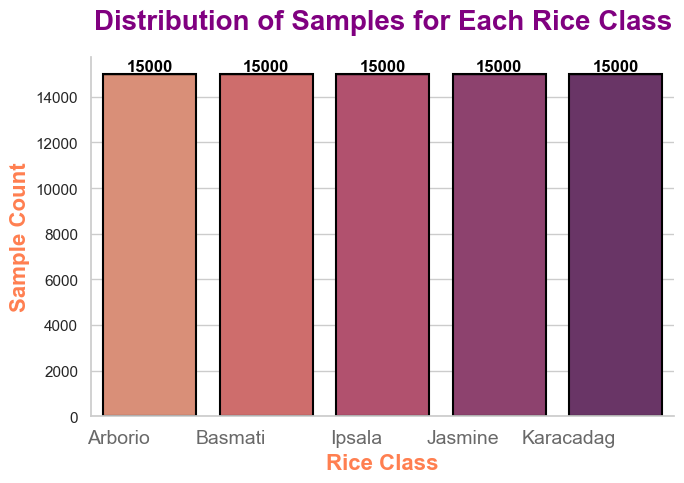

In [48]:
sns.set(style="whitegrid")
colors = sns.color_palette("flare", len(df['label'].unique())) 

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='label', palette=colors, data=df, edgecolor="black", linewidth=1.5)

ax.set_title("Distribution of Samples for Each Rice Class", fontsize=20, weight='bold', color='purple', pad=20)
ax.set_xlabel("Rice Class", fontsize=16, weight='bold', color='coral')
ax.set_ylabel("Sample Count", fontsize=16, weight='bold', color='coral')

plt.xticks(ha='right', fontsize=14, color='dimgray')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

for p in ax.patches:
    ax.add_patch(plt.Rectangle((p.get_x(), p.get_height()), p.get_width(), 0.1, color='black'))

sns.despine()
plt.tight_layout()
plt.show()